In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
print("imported")

imported


In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [10]:
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
EPOCHS = 10 
FOLDS = 3   
DATA_DIR = '../../../chest_xray/train'

print("hypermarameters loaded...")

hypermarameters loaded...


In [12]:
def load_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_data = datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )
    
    val_data = datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
    
    return train_data, val_data

train_data, val_data = load_data(DATA_DIR)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [14]:
# Étape 2: Création du modèle
def create_model(num_conv_layers):
    model = models.Sequential()

    print("Création de la couche d'entrée...")
    model.add(layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

    print(f"Ajout de {num_conv_layers} couches de convolution...")
    for i in range(num_conv_layers):
        print(f"Ajout de la couche de convolution {i+1}...")
        model.add(layers.Conv2D(16, (3, 3), activation='relu')) 
        model.add(layers.MaxPooling2D((2, 2)))

    print("Ajout de la couche Flatten...")
    model.add(layers.Flatten())

    print("Ajout de la couche Dense avec 128 unités...")
    model.add(layers.Dense(64, activation='relu'))

    print("Ajout de la couche de sortie avec activation sigmoid...")
    model.add(layers.Dense(1, activation='sigmoid'))

    print("Compilation du modèle...")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print("Modèle créé avec succès.")
    return model

In [16]:
# Étape 3: Validation croisée K-Fold
def k_fold_cross_validation(num_conv_layers, train_data, val_data):
    kf = KFold(n_splits=FOLDS, shuffle=True)
    accuracy_list = []
    auc_list = []
    all_histories = []  # Pour stocker les historiques d'entraînement

    # Boucle à travers les différentes plis
    for train_index, val_index in kf.split(train_data):
        # Créer un modèle
        model = create_model(num_conv_layers)
        
        # Entraînement avec EarlyStopping pour éviter le sur-apprentissage
        early_stopping = EarlyStopping(monitor='val_loss', patience=3)
        history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, callbacks=[early_stopping], verbose=0)

        # Stocker l'historique
        all_histories.append(history.history)

        # Évaluation
        val_loss, val_accuracy = model.evaluate(val_data)
        accuracy_list.append(val_accuracy)

        # Calcul de la courbe ROC
        y_true = val_data.classes
        y_scores = model.predict(val_data).ravel()
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        auc_list.append(roc_auc)

    return np.mean(accuracy_list), np.mean(auc_list), all_histories


Création de la couche d'entrée...
Ajout de 2 couches de convolution...
Ajout de la couche de convolution 1...
Ajout de la couche de convolution 2...
Ajout de la couche Flatten...
Ajout de la couche Dense avec 128 unités...
Ajout de la couche de sortie avec activation sigmoid...
Compilation du modèle...
Modèle créé avec succès.


C:\Users\vikne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.9402 - loss: 0.1843
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 414ms/step
Création de la couche d'entrée...
Ajout de 2 couches de convolution...
Ajout de la couche de convolution 1...
Ajout de la couche de convolution 2...
Ajout de la couche Flatten...
Ajout de la couche Dense avec 128 unités...
Ajout de la couche de sortie avec activation sigmoid...
Compilation du modèle...
Modèle créé avec succès.
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.9470 - loss: 0.1493
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 384ms/step
Création de la couche d'entrée...
Ajout de 2 couches de convolution...
Ajout de la couche de convolution 1...
Ajout de la couche de convolution 2...
Ajout de la couche Flatten...
Ajout de la couche Dense avec 128 unités...
Ajout de la couche de sortie avec activation sigmoid...
Compilation du modèle...
Modèle créé avec succès.
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 494ms/step - accuracy: 0.9550 - loss: 0.1647
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s

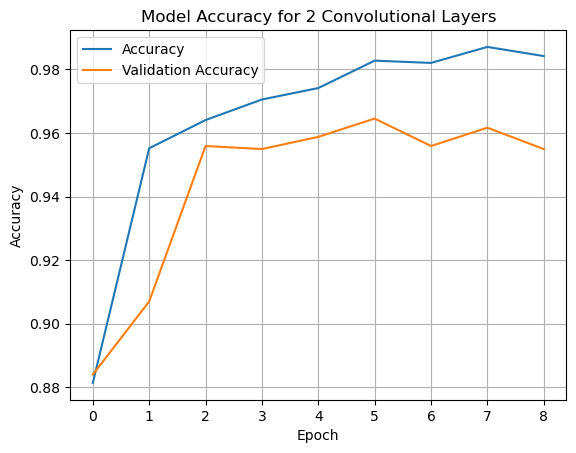

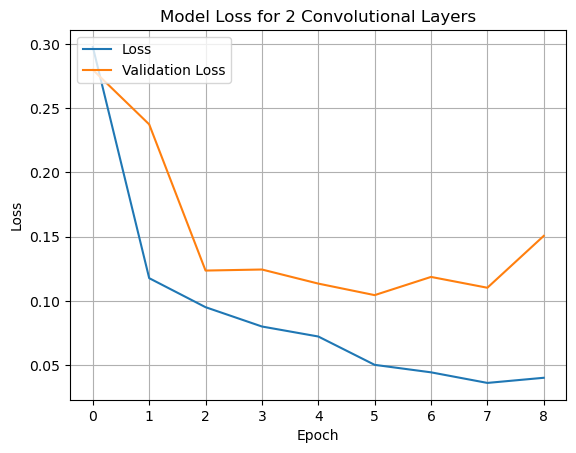

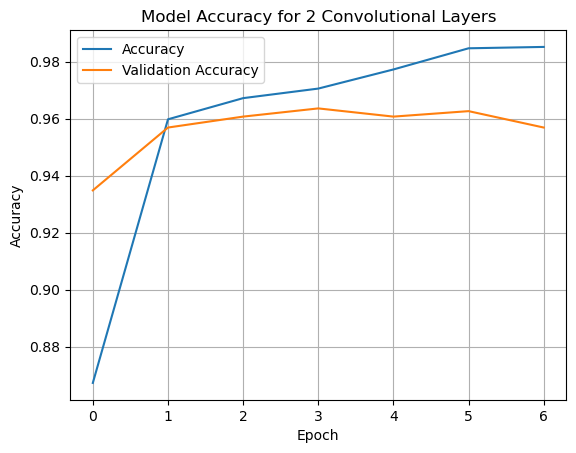

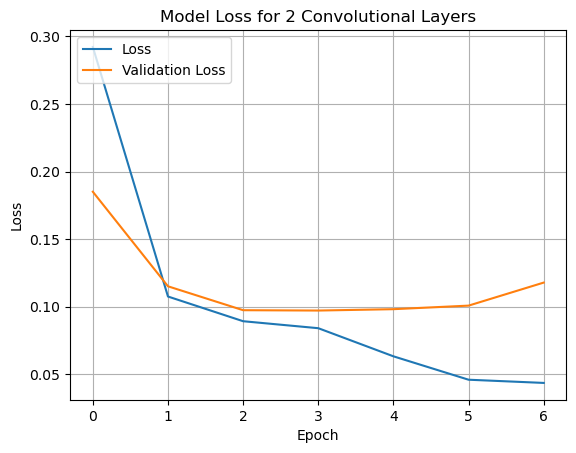

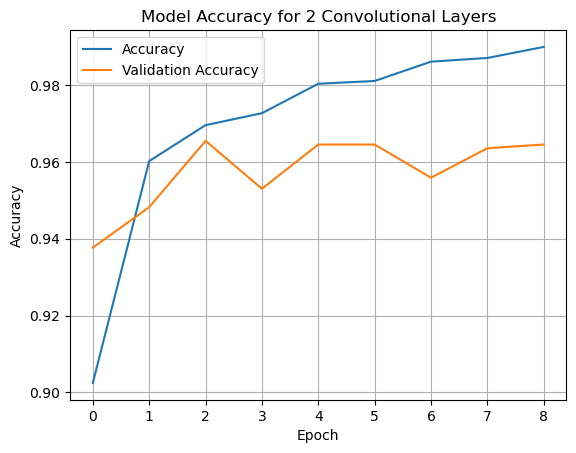

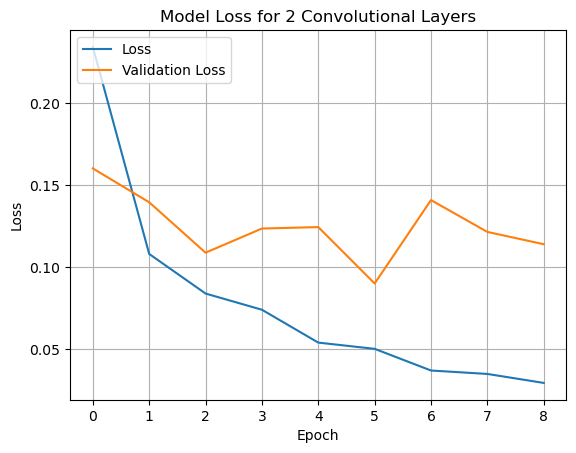

Création de la couche d'entrée...
Ajout de 3 couches de convolution...
Ajout de la couche de convolution 1...
Ajout de la couche de convolution 2...
Ajout de la couche de convolution 3...
Ajout de la couche Flatten...
Ajout de la couche Dense avec 128 unités...
Ajout de la couche de sortie avec activation sigmoid...
Compilation du modèle...
Modèle créé avec succès.
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 498ms/step - accuracy: 0.9645 - loss: 0.1014
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 495ms/step
Création de la couche d'entrée...
Ajout de 3 couches de convolution...
Ajout de la couche de convolution 1...
Ajout de la couche de convolution 2...
Ajout de la couche de convolution 3...
Ajout de la couche Flatten...
Ajout de la couche Dense avec 128 unités...
Ajout de la couche de sortie avec activation sigmoid...
Compilation du modèle...
Modèle créé avec succès.
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.9703 - loss: 0.0901
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 351ms/step
Création de la couche d'entr

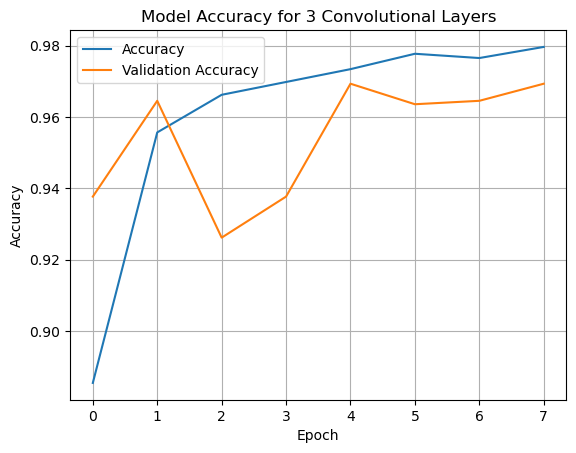

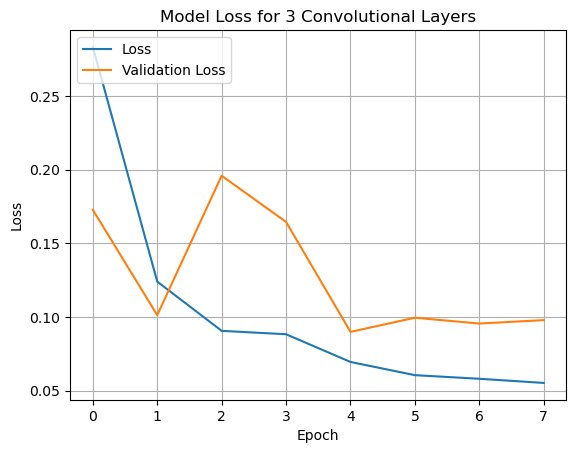

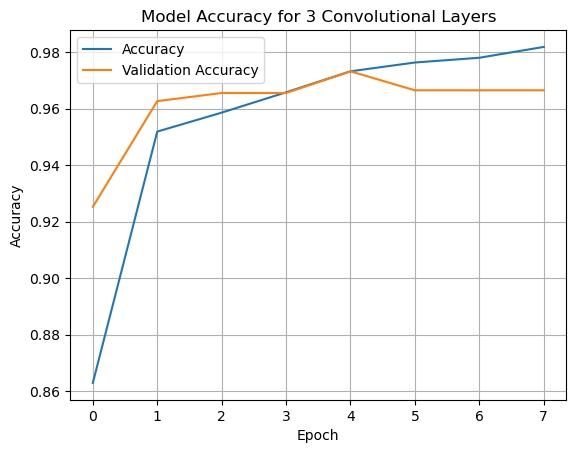

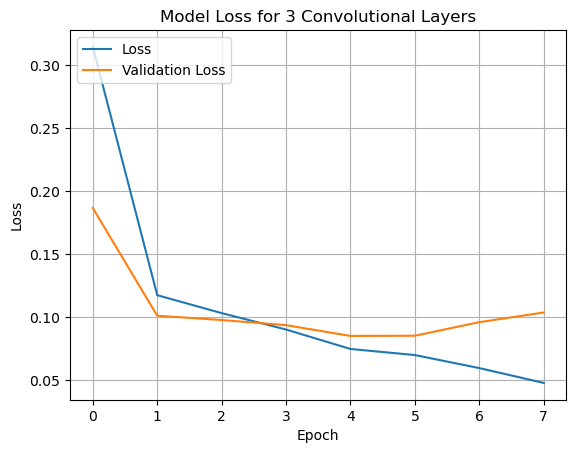

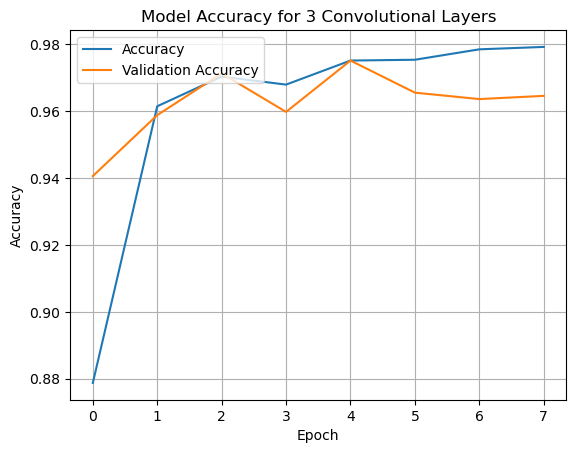

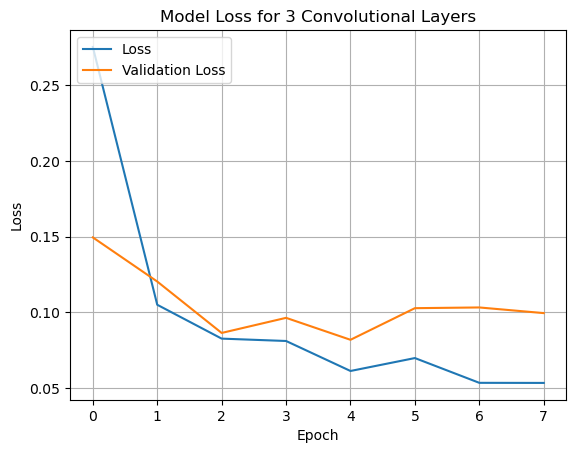

In [18]:
# Étape 4: Test avec différents nombres de couches de convolution
conv_layers_list = [2, 3]  # Reduced number of layers to test
results = {}

for num_layers in conv_layers_list:
    accuracy, roc_auc, histories = k_fold_cross_validation(num_layers, train_data, val_data)
    results[num_layers] = {'Accuracy': accuracy, 'AUC': roc_auc}
    print(f'Layers: {num_layers}, Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}')

    for history in histories:
        plt.plot(history['accuracy'], label='Accuracy')
        plt.plot(history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Model Accuracy for {num_layers} Convolutional Layers')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

        plt.plot(history['loss'], label='Loss')
        plt.plot(history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for {num_layers} Convolutional Layers')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()j

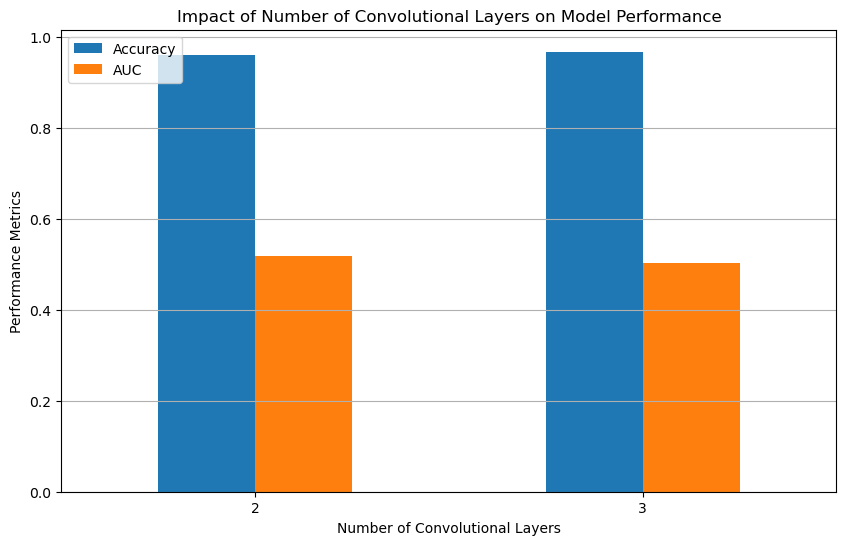

In [19]:
def conv_layer_nb_impact():
    results_df = pd.DataFrame(results).T
    results_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Impact of Number of Convolutional Layers on Model Performance')
    plt.xlabel('Number of Convolutional Layers')
    plt.ylabel('Performance Metrics')
    plt.xticks(rotation=0)
    plt.legend(loc='upper left')
    plt.grid(axis='y')
    plt.show()

conv_layer_nb_impact()

In [46]:
def display_results(results):
    results_df = pd.DataFrame(results).T
    print("\n--- Résultats Finaux ---")
    print(results_df)

    # Détails supplémentaires pour chaque nombre de couches
    for num_layers, metrics in results.items():
        print(f"\n--- Détails pour {num_layers} Couches de Convolution ---")
        print(f"  Précision Moyenne: {metrics['Accuracy']:.4f}")
        print(f"  AUC Moyenne: {metrics['AUC']:.4f}")

        # Optionnel: Si tu souhaites ajouter plus d'évaluations, tu peux le faire ici.
        # Par exemple, afficher les courbes ROC ou d'autres métriques si tu les as calculées.

# Appel de la fonction pour afficher les résultats
display_results(results)


--- Résultats Finaux ---
   Accuracy       AUC
2  0.958773  0.517780
3  0.966763  0.502014

--- Détails pour 2 Couches de Convolution ---
  Précision Moyenne: 0.9588
  AUC Moyenne: 0.5178

--- Détails pour 3 Couches de Convolution ---
  Précision Moyenne: 0.9668
  AUC Moyenne: 0.5020
